In [1]:
import Pkg;
Pkg.activate(".")
# Pkg.add(["Ipopt", "JuMP"])

  Activating environment at `~/Dokumenty/Coding/blog/myblog/code/practical-mathematical-optimization/Project.toml`


In [2]:
using JuMP
using Plots
import Ipopt

prectangle!(w,h,x,y; kwargs...) = plot!(rectangle(w, h, x, y), opacity=.4; kwargs...)

rectangle(w, h, x, y) = Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])

rectangle (generic function with 1 method)

## Garden area

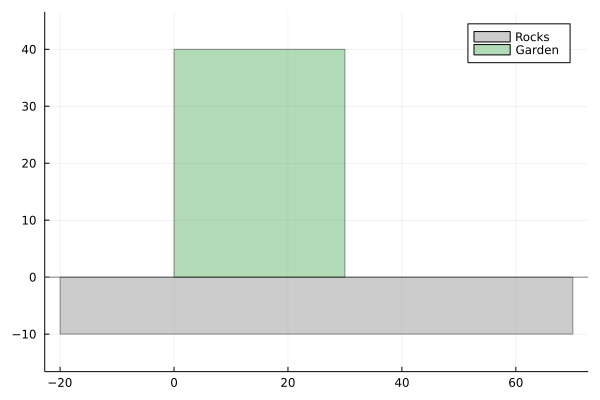

In [3]:
hline([0], color="grey", label=nothing)
prectangle!(90,10,-20,-10, color="grey", label="Rocks")
prectangle!(30, 40, 0, 0, aspect_ratio=:equal, label = "Garden")
# savefig("../../static/posts/practical-mathematical-optimization/example_garden.png")

In [4]:
model = Model(Ipopt.Optimizer)

@variable(model, x)
@variable(model, y)

@objective(model, Max, x*y)

@constraint(model, x + 2y == 100)

print(model)

In [5]:
optimize!(model)
value(x), value(y), objective_value(model)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equal

(50.0, 25.0, 1250.0)

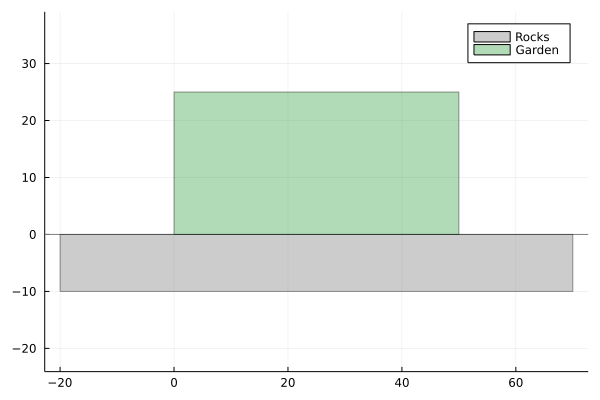

In [6]:
hline([0], color="grey", label=nothing)
prectangle!(90,10,-20,-10, color="grey", label="Rocks")
prectangle!(value(x), value(y), 0, 0, aspect_ratio=:equal, label = "Garden")
# savefig("../../static/posts/practical-mathematical-optimization/optimal_garden.png")

## Shop problem

In [7]:
model = Model(Ipopt.Optimizer)

@variable(model, n)
@variable(model, p)
@variable(model, s)

@objective(model, Max, n * (p - 5))

@constraint(model, n == 16 + s)
@constraint(model, p == 20 - 2s)

print(model)

In [8]:
optimize!(model)

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        4
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [9]:
value.([n, p, s]), objective_value(model)

([11.75, 28.5, -4.249999999999999], 276.125)

## Square in parabola 

In [10]:
model = Model(Ipopt.Optimizer)

@variable(model, a)
ymax = 10
@objective(model, Max, a)

@constraint(model, ymax - 2a >= a*a)

print(model)

In [11]:
optimize!(model)

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [12]:
value(a), objective_value(model)

(2.316624802924551, 2.316624802924551)

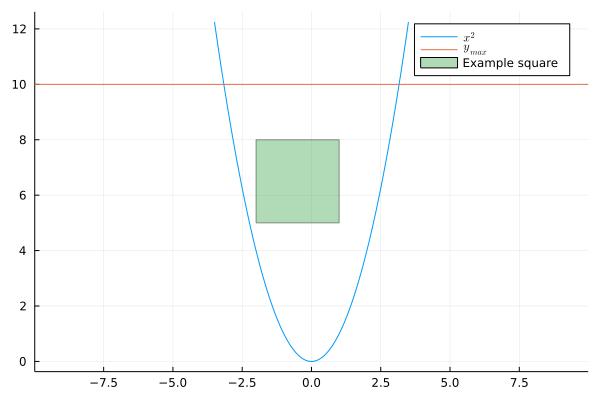

In [13]:
x = -3.5:0.01:3.5 |> collect
y = x .^ 2;
plot(x, y, aspect_ratio=:equal, label="\$x^2\$")
hline!([10], label = "\$y_{max}\$")
prectangle!(3,3,-2, 5, label = "Example square")
# savefig("../../static/posts/practical-mathematical-optimization/quadratic.png")

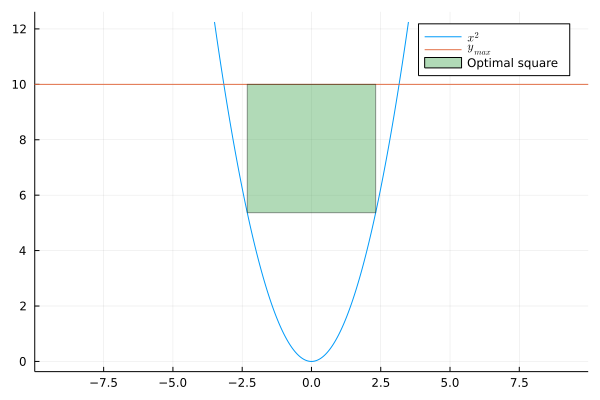

In [14]:
plot(x, y, aspect_ratio=:equal, label="\$x^2\$")
hline!([10], label = "\$y_{max}\$")
av = value(a)
prectangle!(2av, 2av, -av , (-av)^2, label = "Optimal square")
# savefig("../../static/posts/practical-mathematical-optimization/optimal_square.png")

In [15]:
model = Model(Ipopt.Optimizer)

@variable(model, a)
@variable(model, b)
ymax = 10
@objective(model, Max, (2a)*(2b))

@constraint(model, ymax - 2b >= a*a)
@constraint(model, a >= 0)

print(model)

In [16]:
optimize!(model)

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        3
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [17]:
value(a), value(b), objective_value(model)

(1.8257418674792618, 3.333333366323534, 24.343225140649853)

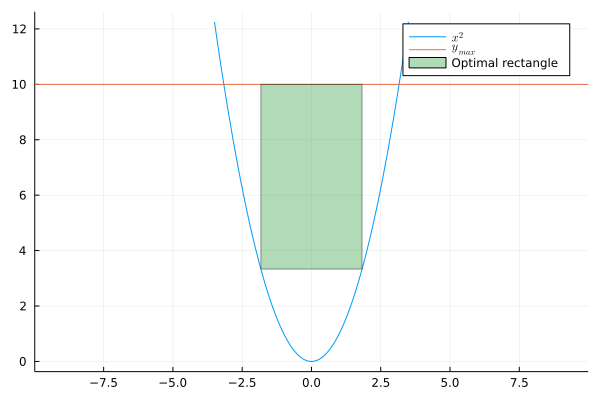

In [18]:
plot(x, y, aspect_ratio=:equal, label="\$x^2\$")
hline!([10], label = "\$y_{max}\$")
av = value(a)
bv = value(b)
prectangle!(2av, 2bv, -av , (-av)^2, label = "Optimal rectangle")
# savefig("../../static/posts/practical-mathematical-optimization/optimal_rectangle.png")

## Juice factory

In [19]:
model = Model(Ipopt.Optimizer)

@variable(model, a)
@variable(model, p)
@variable(model, aj)
@variable(model, pj)
@variable(model, j)

@constraint(model, a >= 0)
@constraint(model, aj >= 0)
@constraint(model, a + aj <= 500)

@constraint(model, p >= 0)
@constraint(model, pj >= 0)
@constraint(model, p + pj <= 300)

@constraint(model, aj == 2j)
@constraint(model, pj == j)

@objective(model, Max, 5a + 7p + 20j)
print(model)

In [20]:
optimize!(model)

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        4
Number of nonzeros in inequality constraint Jacobian.:        8
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        5
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        6
        inequality constraints with only lower bounds:        4
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [21]:
round.(value.([a, aj, p, pj, j])), round(objective_value(model))

([-0.0, 500.0, 50.0, 250.0, 250.0], 5350.0)